In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\sample_submission.csv
data\test.csv
data\test.parquet
data\train.csv
data\train.parquet
data\bb_features\bb_features_apfp.csv
data\bb_features\bb_features_atompair_1024.npz
data\bb_features\bb_features_ecfp6_2048.csv
data\bb_features\bb_features_ecfp_1024.csv
data\bb_features\bb_features_fcfp-count_1024.npz
data\bb_features\bb_features_fcfp_1024.npz
data\bb_features\bb_features_maccs_1024.npz
data\bb_features\bb_features_mpnn1_3Msplit.csv
data\bb_features\bb_features_phys_chem.csv
data\bb_features\bb_features_p_active_all_train.csv
data\bb_features\bb_features_secfp6_2048.csv
data\bb_features\bb_features_secfp_1024.csv
data\bb_features\bb_features_secfp_512.csv
data\bb_features\bb_features_topological-count_1024.npz
data\bb_features\bb_features_topological_1024.npz
data\bb_features\bb_pairs_prop_binds.qs
data\bb_features\bb_summary.qs
data\features\bb_mol_apfp_features.csv
data\features\bb_mol_phys_chem_features.csv
data\features\tam_sim_fmcs_bb_smiles.qs
data\for_sim_analysis\mol

In [51]:
test_df = pd.read_csv('data/test.csv')
test_df

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
0,295246830,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,BRD4
1,295246831,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,HSA
2,295246832,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,sEH
3,295246833,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,BRD4
4,295246834,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,HSA
...,...,...,...,...,...,...
1674891,296921721,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,COC1CCC(CCN)CC1,COC1CCC(CCNc2nc(Nc3noc4ccc(F)cc34)nc(N[C@@H](C...,HSA
1674892,296921722,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,COC1CCC(CCN)CC1,COC1CCC(CCNc2nc(Nc3noc4ccc(F)cc34)nc(N[C@@H](C...,sEH
1674893,296921723,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,NCc1cccs1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cccs2)nc(Nc2noc3...,BRD4
1674894,296921724,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,NCc1cccs1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cccs2)nc(Nc2noc3...,HSA


In [52]:
# Specify the path to your large CSV file
# filename = 'data/train.csv'
filename = "output/dataset30000.csv"
# Read the first 3,000,000 rows
train_df = pd.read_csv(filename)

# Now 'df' contains the first 3,000,000 rows of your data
print(train_df.head()) 

   Unnamed: 0         id                              buildingblock1_smiles  \
0           0   38368207     COc1cccc(C(=O)O)c1NC(=O)OCC1c2ccccc2-c2ccccc21   
1           1  262652024  O=C(O)C[C@H](C/C=C/c1ccccc1)NC(=O)OCC1c2ccccc2...   
2           2  107953126  O=C(N[C@@H](Cc1csc2ccccc12)C(=O)O)OCC1c2ccccc2...   
3           3  163905254     O=C(Nc1cc(C(=O)O)ccc1Br)OCC1c2ccccc2-c2ccccc21   
4           4  239816757                O=C(O)CNC(=O)OCC1c2ccccc2-c2ccccc21   

      buildingblock2_smiles       buildingblock3_smiles  \
0           COc1cc(Br)ccc1N                Cn1cc(CN)cn1   
1             CCC(CC)(CN)OC           Nc1ncnc2[nH]ncc12   
2  CCN1CCN(Cc2ccc(N)nc2)CC1  NCCC(=O)N1CCN(c2ccccn2)CC1   
3  Cl.Cl.NCCn1cnc2ccsc2c1=O                 Nc1cn[nH]c1   
4  CN(C)C(=O)C1CCC(CN)O1.Cl         NCc1nc(-c2ccsc2)no1   

                                     molecule_smiles protein_name  binds  
0  COc1cc(Br)ccc1Nc1nc(NCc2cnn(C)c2)nc(Nc2c(OC)cc...          HSA      0  
1  CCC(CC)(CNc1nc(Nc

In [53]:
def count_uniques(col):
    s = 0
    r = []
    names = []
    l = list(col.unique())
    for i in l:
        a = col.value_counts()[i]
        r.append(a)
        s += a
        names.append(i)
    print(f"\n******     Report    ******\n")
    print(f"Sum = {s}")
    for j in range(0 , len(names)):
        print(f"Count {names[j]} = {r[j]}")
        print(f"Percent {names[j]} = {'%.2f' %(((r[j])/s)*100)}%")

In [54]:
molecule_smiles = []
for i in train_df['molecule_smiles']:
    molecule_smiles.append(i)
            
print(f'{len(pd.Series(molecule_smiles).unique())} / {len(molecule_smiles)}')

59970 / 60000


In [55]:
from rdkit import Chem
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem.Descriptors import ExactMolWt 
from rdkit.Chem.rdMolDescriptors import CalcNumHBA , CalcNumHBD , CalcTPSA , CalcNumRotatableBonds
from rdkit.Chem.Crippen import MolLogP 
 


def count_atoms_bonds_charges(smiles):
    # Parse SMILES into RDKit Mol object
    mol = MolFromSmiles(smiles)    
    # Calculate the number of atoms and bonds
    atom_count = mol.GetNumAtoms()
    bond_count = mol.GetNumBonds()
    # Calculate the molecular weight
    molecular_weight = ExactMolWt(mol)
    molecular_weight = round(molecular_weight, 2)

    logP = MolLogP(mol)
    logP = round(logP , 2)
    hb_acceptor = CalcNumHBA(mol)
    hb_donor = CalcNumHBD(mol)
    
    tpsa = CalcTPSA(mol)
    
    rotatable_bond = CalcNumRotatableBonds(mol)
    
    # Calculate the number of charges (positive and negative)
    try:
        charges = [atom.GetProp('_Charge') for atom in mol.GetAtoms()]
        pos_charges = len([c for c in charges if c > 0])
        neg_charges = len([c for c in charges if c < 0])
        
        
    except KeyError:
        pos_charges = 0
        neg_charges = 0
    
    return {
        'atoms': atom_count,
        'bonds': bond_count,
        'positive_charges': pos_charges,
        'negative_charges': neg_charges,
        'molecular_weight' : molecular_weight,
        'LogP' : logP ,
        'HBA' : hb_acceptor ,
        'HBD' : hb_donor,
        'TPSA' : tpsa ,
        'Rotatable Bonds' : rotatable_bond
    }

In [56]:
pd.DataFrame(train_df)

,Unnamed: 0,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,0,38368207,COc1cccc(C(=O)O)c1NC(=O)OCC1c2ccccc2-c2ccccc21,COc1cc(Br)ccc1N,Cn1cc(CN)cn1,COc1cc(Br)ccc1Nc1nc(NCc2cnn(C)c2)nc(Nc2c(OC)cc...,HSA,0
1,1,262652024,O=C(O)C[C@H](C/C=C/c1ccccc1)NC(=O)OCC1c2ccccc2...,CCC(CC)(CN)OC,Nc1ncnc2[nH]ncc12,CCC(CC)(CNc1nc(Nc2ncnc3[nH]ncc23)nc(N[C@@H](C/...,sEH,0
2,2,107953126,O=C(N[C@@H](Cc1csc2ccccc12)C(=O)O)OCC1c2ccccc2...,CCN1CCN(Cc2ccc(N)nc2)CC1,NCCC(=O)N1CCN(c2ccccn2)CC1,CCN1CCN(Cc2ccc(Nc3nc(NCCC(=O)N4CCN(c5ccccn5)CC...,HSA,0
3,3,163905254,O=C(Nc1cc(C(=O)O)ccc1Br)OCC1c2ccccc2-c2ccccc21,Cl.Cl.NCCn1cnc2ccsc2c1=O,Nc1cn[nH]c1,O=C(N[Dy])c1ccc(Br)c(Nc2nc(NCCn3cnc4ccsc4c3=O)...,sEH,0
4,4,239816757,O=C(O)CNC(=O)OCC1c2ccccc2-c2ccccc21,CN(C)C(=O)C1CCC(CN)O1.Cl,NCc1nc(-c2ccsc2)no1,CN(C)C(=O)C1CCC(CNc2nc(NCC(=O)N[Dy])nc(NCc3nc(...,BRD4,0
...,...,...,...,...,...,...,...,...
59995,59995,209149877,O=C(Nc1cccc(Br)c1C(=O)O)OCC1c2ccccc2-c2ccccc21,Nc1ncc(F)cn1,CCOC(=O)c1ncccc1N,CCOC(=O)c1ncccc1Nc1nc(Nc2ncc(F)cn2)nc(Nc2cccc(...,sEH,1
59996,59996,129405747,O=C(N[C@H]1C=C[C@@H](C(=O)O)C1)OCC1c2ccccc2-c2...,Nc1cc(Cl)c(O)c(Cl)c1,NCc1nc2ccccc2s1,O=C(N[Dy])[C@@H]1C=C[C@H](Nc2nc(NCc3nc4ccccc4s...,BRD4,1
59997,59997,263231977,O=C(O)C[C@H](C/C=C/c1ccccc1)NC(=O)OCC1c2ccccc2...,Cl.NCc1nnc2ncccn12,COc1cncc(N)c1,COc1cncc(Nc2nc(NCc3nnc4ncccn34)nc(N[C@@H](C/C=...,HSA,1
59998,59998,187629594,O=C(Nc1ccc(C(=O)O)cc1)OCC1c2ccccc2-c2ccccc21,COc1cc(C#N)c(F)cc1N,C=C(C)C(=O)NCCN.Cl,C=C(C)C(=O)NCCNc1nc(Nc2ccc(C(=O)N[Dy])cc2)nc(N...,BRD4,1


In [57]:
from tqdm import tqdm
r = []
# for i in tqdm(molecule_smiles[0:60000]):
#     result = count_atoms_bonds_charges(i)
#     r.append(result)

# # 保存到CSV文件
# df = pd.DataFrame(r)
# df.to_csv('output/Train60k.csv', index=False)

In [58]:
# 从CSV文件读取数据
df = pd.read_csv('output/Train60k.csv')
# 将 DataFrame 转换为字典列表形式
r = df.to_dict(orient='records')

In [59]:
list(train_df['binds'][:].unique())

[0, 1]

In [60]:
len(r)

60000

In [ ]:
# Importing library
from sklearn.preprocessing import OneHotEncoder

# Creating an instance
encoder_onehot = OneHotEncoder(sparse_output=False)

# Training
encoder_onehot_fit = encoder_onehot.fit_transform(r['protein_name'].values.reshape(-1, 1))

# Viewing
encoder_onehot

In [ ]:
data = r
ids = train_df['id']
atoms = []
bonds = []
positive_charges = []
negative_charges = []
ndfids = []
protein_names = []
molecular_weights = []
logPs = []
hb_acceptors = []
hb_donors = []
tpsas = [] 
rotatable_bonds = []
binds = []
encoder_onehot_fit = []

for i in tqdm(range(0,len(data))):
    ndfids.append(ids[i])
    atoms.append(data[i]['atoms'])
    bonds.append(data[i]['bonds'])
    positive_charges.append(data[i]['positive_charges'])
    negative_charges.append(data[i]['negative_charges'])
    protein_names.append(train_df['protein_name'][i])
    molecular_weights.append(data[i]['molecular_weight'])
    logPs.append(data[i]['LogP'])
    hb_acceptors.append(data[i]['HBA'])
    hb_donors.append(data[i]['HBD'])
    tpsas.append(data[i]['TPSA'])
    rotatable_bonds.append(data[i]['Rotatable Bonds'])
    
    
df_molecule_smiles = pd.DataFrame()
df_molecule_smiles['ids'] = ndfids
df_molecule_smiles['protein_names'] = protein_names
df_molecule_smiles['Atoms'] = atoms
df_molecule_smiles['Bonds'] = bonds 
df_molecule_smiles['molecular weight'] = molecular_weights
df_molecule_smiles['LogP'] = logPs
df_molecule_smiles['HBA'] = hb_acceptors
df_molecule_smiles['HBD'] = hb_donors
df_molecule_smiles['TPSA'] = tpsas
df_molecule_smiles['Rotatable Bonds'] = rotatable_bonds
df_molecule_smiles['binds'] = train_df['binds']

df_moleculesmiles = df_molecule_smiles
df_molecule_smiles

100%|██████████| 60000/60000 [00:00<00:00, 259319.04it/s]


,ids,protein_names,Atoms,Bonds,molecular weight,LogP,HBA,HBD,TPSA,Rotatable Bonds,binds
0,38368207,HSA,37,40,716.04,3.68,11,4,140.14,10,0
1,262652024,sEH,41,44,708.22,3.75,11,5,167.55,15,0
2,107953126,HSA,55,61,912.29,3.51,14,4,159.67,15,0
3,163905254,sEH,37,41,729.98,2.92,12,5,167.43,9,0
4,239816757,BRD4,36,39,665.11,0.64,13,4,172.32,11,0
...,...,...,...,...,...,...,...,...,...,...,...
59995,209149877,sEH,38,41,730.99,3.56,12,4,168.83,9,1
59996,129405747,BRD4,37,41,705.00,4.79,10,5,136.98,8,1
59997,263231977,HSA,42,46,715.17,2.92,13,4,169.06,13,1
59998,187629594,BRD4,38,40,668.12,2.68,10,5,165.98,11,1


In [62]:
df_molecule_smiles['binds'] = train_df['binds']

In [63]:
df_moleculesmiles.loc[:,'Atoms':'binds']

,Atoms,Bonds,molecular weight,LogP,HBA,HBD,TPSA,Rotatable Bonds,binds
0,37,40,716.04,3.68,11,4,140.14,10,0
1,41,44,708.22,3.75,11,5,167.55,15,0
2,55,61,912.29,3.51,14,4,159.67,15,0
3,37,41,729.98,2.92,12,5,167.43,9,0
4,36,39,665.11,0.64,13,4,172.32,11,0
...,...,...,...,...,...,...,...,...,...
59995,38,41,730.99,3.56,12,4,168.83,9,1
59996,37,41,705.00,4.79,10,5,136.98,8,1
59997,42,46,715.17,2.92,13,4,169.06,13,1
59998,38,40,668.12,2.68,10,5,165.98,11,1


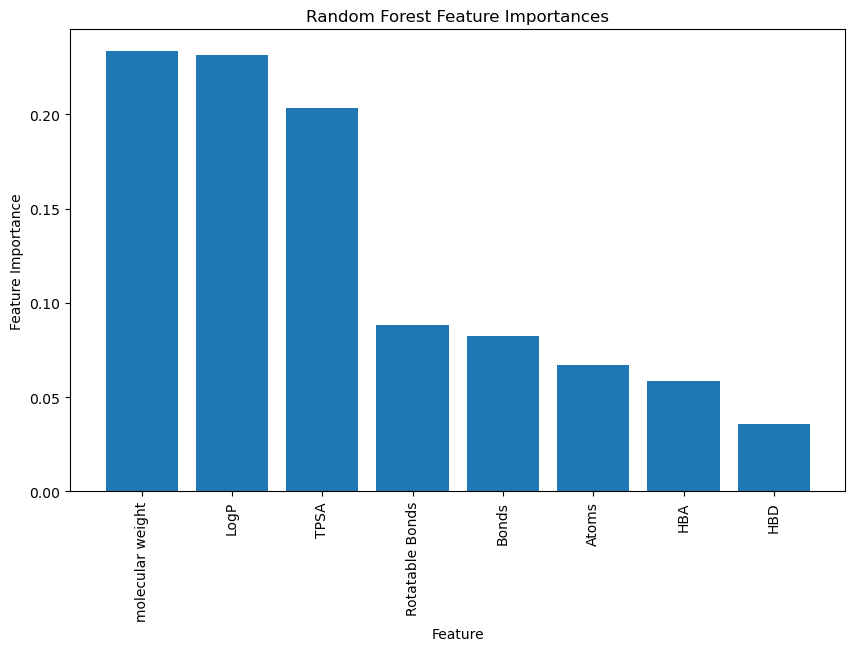

In [64]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df_moleculesmiles.loc[0:1000000:,'Atoms':'Rotatable Bonds']
y = df_moleculesmiles['binds'][0:1000001]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

rf_importances = rf_classifier.feature_importances_
rf_sorted_indices = np.argsort(rf_importances)[::-1]

# Select features with non-zero importance
threshold = 0.02  # Set a threshold for feature importance
rf_selected_features = X.columns[rf_importances > threshold]
rf_X_filtered = X[rf_selected_features]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), rf_importances[rf_sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[rf_sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

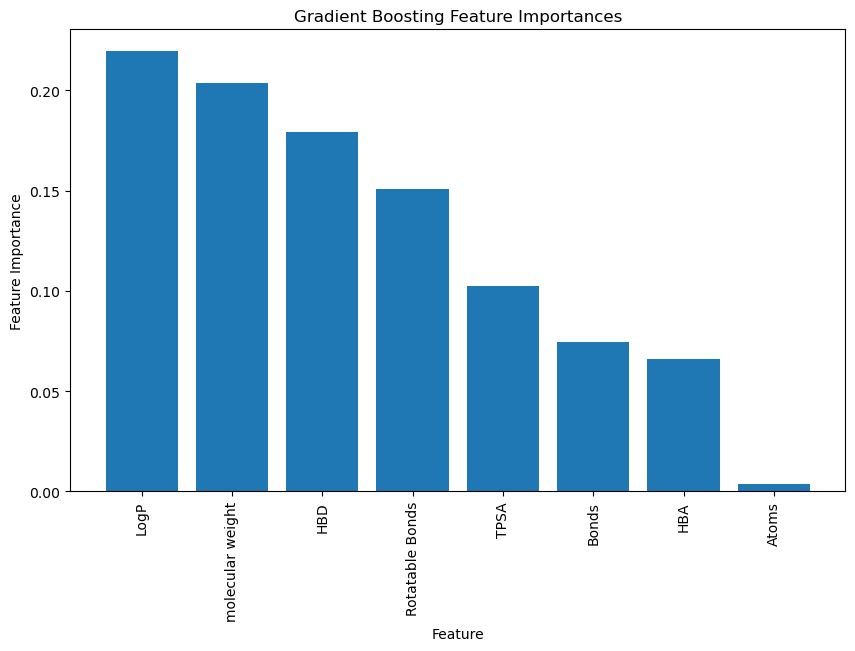

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(X, y)

gb_importances = gb_classifier.feature_importances_

gb_sorted_indices = np.argsort(gb_importances)[::-1]
# Select features with non-zero importance
threshold = 0.02  # Set a threshold for feature importance
gb_selected_features = X.columns[gb_importances > threshold]

# Filter X to keep only the selected features
gb_X_filtered = X[gb_selected_features]
plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importances")
plt.bar(range(X.shape[1]), gb_importances[gb_sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[gb_sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

In [66]:
# find most possitive features to work on them

mx = gb_importances[gb_sorted_indices].max()
mn = gb_importances[gb_sorted_indices].min()
n = X.columns[gb_sorted_indices]
s = gb_importances[gb_sorted_indices]
print('\n***** Feature Importance of Gradient Boost Classifier *****\n')
for i in range(0 , len(s)):      
    if s[i] == mx:
        print(f'{n[i]} = {s[i]} ,\n{n[i+1]} = {s[i+1]} ,\n{n[i+2]} = {s[i+2]}')
        break
    else:
        continue


***** Feature Importance of Gradient Boost Classifier *****

LogP = 0.21933762117464814 ,
molecular weight = 0.20366343397079215 ,
HBD = 0.17920623683315212


In [67]:
mx = rf_importances[rf_sorted_indices].max()
mn = rf_importances[rf_sorted_indices].min()
n = X.columns[rf_sorted_indices]
s = rf_importances[rf_sorted_indices]
print('\n***** Feature Importance of Random Forest *****\n')
for i in range(0 , len(s)):      
    if s[i] == mx:
        print(f'{n[i]} = {s[i]} ,\n{n[i+1]} = {s[i+1]} ,\n{n[i+2]} = {s[i+2]}')
        break
    else:
        continue


***** Feature Importance of Random Forest *****

molecular weight = 0.23335675961209734 ,
LogP = 0.23143303094355602 ,
TPSA = 0.20320206199558613


In [68]:
df_moleculesmiles

,ids,protein_names,Atoms,Bonds,molecular weight,LogP,HBA,HBD,TPSA,Rotatable Bonds,binds
0,38368207,HSA,37,40,716.04,3.68,11,4,140.14,10,0
1,262652024,sEH,41,44,708.22,3.75,11,5,167.55,15,0
2,107953126,HSA,55,61,912.29,3.51,14,4,159.67,15,0
3,163905254,sEH,37,41,729.98,2.92,12,5,167.43,9,0
4,239816757,BRD4,36,39,665.11,0.64,13,4,172.32,11,0
...,...,...,...,...,...,...,...,...,...,...,...
59995,209149877,sEH,38,41,730.99,3.56,12,4,168.83,9,1
59996,129405747,BRD4,37,41,705.00,4.79,10,5,136.98,8,1
59997,263231977,HSA,42,46,715.17,2.92,13,4,169.06,13,1
59998,187629594,BRD4,38,40,668.12,2.68,10,5,165.98,11,1


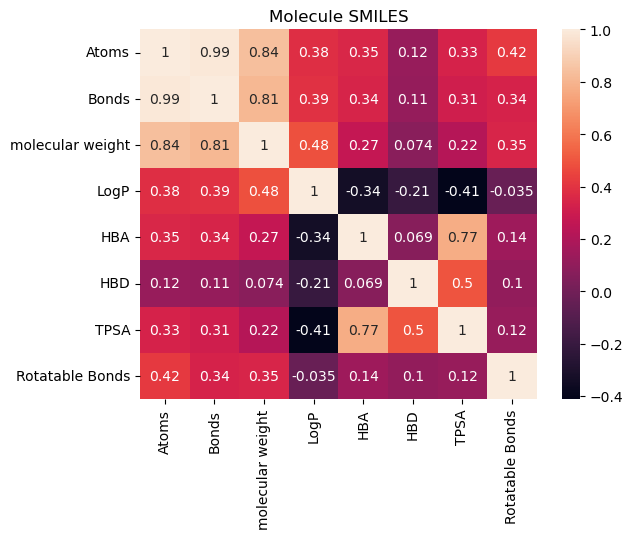

In [69]:
import seaborn as sns
sns.heatmap(df_moleculesmiles.loc[0:1000000:,'Atoms':'Rotatable Bonds'].corr(),annot=True)
plt.title('Molecule SMILES')
plt.show()

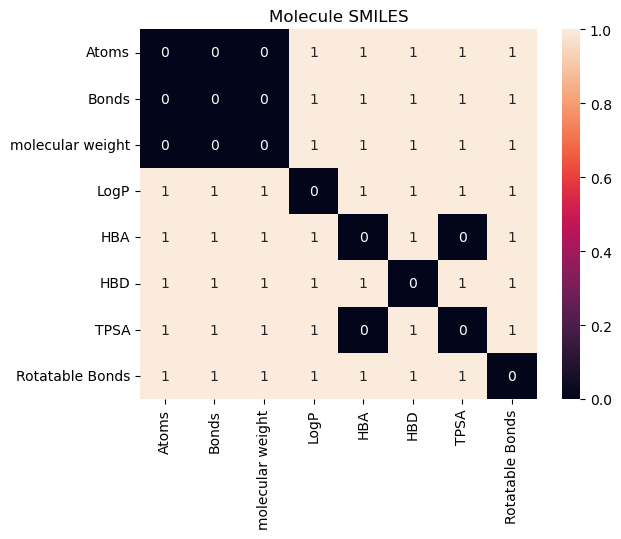

In [70]:
import seaborn as sns

sns.heatmap(df_moleculesmiles.loc[0:1000000:,'Atoms':'Rotatable Bonds'].corr() < 0.7,annot=True)
plt.title('Molecule SMILES')
plt.show()

In [71]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Standardization (Z-score normalization)
# scaler = StandardScaler()
# gb_X_scaled_standardized = scaler.fit_transform(gb_X_filtered)

# # Normalization (Min-Max scaling)
# min_max_scaler = MinMaxScaler()
# gb_X_scaled_normalized = min_max_scaler.fit_transform(X)

# gb_X_filtered.columns 

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# scaler = StandardScaler()

# rf_X_scaled_standardized = scaler.fit_transform(rf_X_filtered)

# # Normalization (Min-Max scaling)
# min_max_scaler = MinMaxScaler()
# rf_X_scaled_normalized = min_max_scaler.fit_transform(X)

# rf_X_filtered.columns

In [73]:
df_copy= df_molecule_smiles
df_f=df_copy[['Bonds','Atoms','molecular weight', 'LogP', 'HBA', 'HBD', 'TPSA','Rotatable Bonds']]

In [74]:
df_f.columns

Index(['Bonds', 'Atoms', 'molecular weight', 'LogP', 'HBA', 'HBD', 'TPSA',
       'Rotatable Bonds'],
      dtype='object')

In [75]:
df_f.loc[:, 'ids'] = df_molecule_smiles['ids']
df_f.loc[:, 'binds'] = df_molecule_smiles['binds']

C:\Users\PC\AppData\Local\Temp\ipykernel_147296\3199841793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.loc[:, 'ids'] = df_molecule_smiles['ids']
C:\Users\PC\AppData\Local\Temp\ipykernel_147296\3199841793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.loc[:, 'binds'] = df_molecule_smiles['binds']


In [76]:
df_f.head(3)

,Bonds,Atoms,molecular weight,LogP,HBA,HBD,TPSA,Rotatable Bonds,ids,binds
0,40,37,716.04,3.68,11,4,140.14,10,38368207,0
1,44,41,708.22,3.75,11,5,167.55,15,262652024,0
2,61,55,912.29,3.51,14,4,159.67,15,107953126,0


In [77]:
test_df = 'data/test.csv'
test_df = pd.read_csv(test_df)

In [78]:
molecule_smiles = []
for i in test_df['molecule_smiles']:
    molecule_smiles.append(i)

In [79]:
# r = []

# for i in tqdm(molecule_smiles[:800000]):
#     result = count_atoms_bonds_charges(i)
#     r.append(result)

In [80]:
# for i in tqdm(molecule_smiles[800000:]):
#     result = count_atoms_bonds_charges(i)
#     r.append(result)

# # 保存到CSV文件
# df = pd.DataFrame(r)
# df.to_csv('output/Test300.csv', index=False)

In [81]:
# 从CSV文件读取数据
df = pd.read_csv('output/Test300.csv')
r = df.to_dict(orient='records')

In [82]:
data = r
ids = test_df['id']
atoms = []
bonds = []
positive_charges = []
negative_charges = []
ndfids = []
protein_names = []
molecular_weights = []
logPs = []
hb_acceptors = []
hb_donors = []
tpsas = [] 
rotatable_bonds = []


for i in range(0,len(data)):
    ndfids.append(ids[i])
    atoms.append(data[i]['atoms'])
    bonds.append(data[i]['bonds'])
    positive_charges.append(data[i]['positive_charges'])
    negative_charges.append(data[i]['negative_charges'])
    protein_names.append(test_df['protein_name'][i])
    molecular_weights.append(data[i]['molecular_weight'])
    logPs.append(data[i]['LogP'])
    hb_acceptors.append(data[i]['HBA'])
    hb_donors.append(data[i]['HBD'])
    tpsas.append(data[i]['TPSA'])
    rotatable_bonds.append(data[i]['Rotatable Bonds'])
    
    
df_molecule_smiles = pd.DataFrame()
df_molecule_smiles['ids'] = ndfids
df_molecule_smiles['protein_names'] = protein_names
df_molecule_smiles['Bonds'] = bonds 
df_molecule_smiles['Atoms'] = atoms
df_molecule_smiles['molecular weight'] = molecular_weights
df_molecule_smiles['LogP'] = logPs
df_molecule_smiles['HBA'] = hb_acceptors
df_molecule_smiles['HBD'] = hb_donors
df_molecule_smiles['TPSA'] = tpsas
df_molecule_smiles['Rotatable Bonds'] = rotatable_bonds

#there was no charge possitive or negative in these 5000 samples in molecule_smiles column
df_moleculesmiles = df_molecule_smiles
df_molecule_smiles

,ids,protein_names,Bonds,Atoms,molecular weight,LogP,HBA,HBD,TPSA,Rotatable Bonds
0,295246830,BRD4,37,35,616.15,4.81,7,4,103.86,12
1,295246831,HSA,37,35,616.15,4.81,7,4,103.86,12
2,295246832,sEH,37,35,616.15,4.81,7,4,103.86,12
3,295246833,BRD4,43,40,690.17,2.69,12,5,167.69,13
4,295246834,HSA,43,40,690.17,2.69,12,5,167.69,13
...,...,...,...,...,...,...,...,...,...,...
1674891,296921721,HSA,43,40,704.19,4.35,11,4,187.88,14
1674892,296921722,sEH,43,40,704.19,4.35,11,4,187.88,14
1674893,296921723,BRD4,39,36,660.07,4.02,11,4,178.65,12
1674894,296921724,HSA,39,36,660.07,4.02,11,4,178.65,12


In [83]:
print(df_f.columns)
print(df_molecule_smiles.columns)

Index(['Bonds', 'Atoms', 'molecular weight', 'LogP', 'HBA', 'HBD', 'TPSA',
       'Rotatable Bonds', 'ids', 'binds'],
      dtype='object')
Index(['ids', 'protein_names', 'Bonds', 'Atoms', 'molecular weight', 'LogP',
       'HBA', 'HBD', 'TPSA', 'Rotatable Bonds'],
      dtype='object')


In [84]:
import pandas as pd
from sklearn import svm, ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso, Ridge
from tqdm import tqdm
import time
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

# Assuming your train data is stored in a DataFrame called 'df_f'
X_train = df_f.loc[:, "Bonds":"Rotatable Bonds"]
Y_train = df_f["binds"]  # Assuming the target variable is named 'binds'

# Encode the target variable (if it's not already binary)
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)

# Split data into 80% training and 20% validation
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Machine learning model
models = { 
    
    # model Logistic Regression
    "Logistic_Regression": LogisticRegression(),
    
    # model Naive bayes
    "Naive_bayes": GaussianNB(),
    
    # model KNN
    "KNN": KNeighborsClassifier(),
    
    # model AdaBoost
    "Ada_Boost": AdaBoostClassifier(),
    
    # model Gradient Boosting
    "Gradient_Boosting_Classifier": GradientBoostingClassifier(),
    
    # model Decision Tree Classifier - With adjusted internal parameters
    "Decision_Tree_Classifier": DecisionTreeClassifier(max_depth=5, 
                                                       min_samples_split=2, 
                                                       random_state=105),

    # Random Forest Classifier
    "Random_Forest": RandomForestClassifier(n_estimators=100, max_depth=10),
    
    # model XGBoost - With adjusted internal parameters
    "XGBoost": XGBClassifier(n_estimators=100,
                             max_depth=250,
                             learning_rate=0.1,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             objective='multi:softmax',
                             num_class=3,
                             random_state=42,
                             tree_method='gpu_hist'),
    
    # model LGBM - with adjusted internal parameters
    "LGBM": LGBMClassifier(boosting_type='gbdt',
                           bagging_freq=5,
                           verbose=0,
                           device='gpu',
                           num_leaves=31,
                           max_depth=250,
                           learning_rate=0.1,
                           n_estimators=100),

    
    # CatBoost
    "CatBoost": CatBoostClassifier(iterations=100,
                                   learning_rate=0.1,
                                   depth=10,
                                   cat_features=None,  # Specify the categorical feature indices if available
                                   task_type='GPU',
                                   devices='0',  # Set to '0' for the first GPU, adjust if needed
                                   early_stopping_rounds=10,
                                   verbose=0),
    
    # Multi-layer Perception classifier
     "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=100),

    # Lasso Regression
    #"Lasso": Lasso(alpha=0.1),  # You can adjust the alpha parameter as needed
    
    # Ridge Regression
    #"Ridge": Ridge(alpha=0.1)   # You can adjust the alpha parameter as needed

}

# Train models and evaluate
model_accuracies = {}
submission_dir = "ckpoint/ML/"  # Directory for saving all models' submissions

# Iterate over models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Record start time for training
    start_time = time.time()

    # Initialize progress bar for the model
    progress_bar = tqdm(total=len(X_train_split), desc=f"{model_name} training", position=0, leave=True)

    # Train the model and calculate accuracy on validation set
    model.fit(X_train_split, Y_train_split)

    # Predict and calculate accuracy on validation set
    Y_val_pred = model.predict(X_val_split)
    acc = accuracy_score(Y_val_split, Y_val_pred)

    # Record end time for training
    end_time = time.time()
    training_time = end_time - start_time
    samples_per_second = len(X_train_split) / training_time  # Samples processed per second

    # Store accuracy and model training time
    model_accuracies[model_name] = {"accuracy": acc, "training_time": training_time, "samples_per_second": samples_per_second}

    # Output model's training time and speed
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(f"Training time: {training_time:.2f} seconds, Speed: {samples_per_second:.2f} samples/second")

    # Assuming your test data is stored in a DataFrame called 'df_molecule_smiles'
    X_test = df_molecule_smiles.loc[:, "Bonds":"Rotatable Bonds"]

    # Predict the response for the test dataset
    Y_pred = model.predict_proba(X_test)

    Y_pred = Y_pred[:, 1]

    # Create a DataFrame with the test IDs and their corresponding predicted values
    submission_df = pd.DataFrame({"id": df_molecule_smiles["ids"], "binds": Y_pred})

    # Save the submission file for this model
    submission_filename = f"{submission_dir}submission_{model_name}.csv"
    submission_df.to_csv(submission_filename, index=False)
    print(f"Submission saved to {submission_filename}")

# After all models are trained, print the overall results
print("\nSummary of all models:")
for model_name, metrics in model_accuracies.items():
    print(f"{model_name}: Accuracy: {metrics['accuracy']:.4f}, Training Time: {metrics['training_time']:.2f} seconds, Speed: {metrics['samples_per_second']:.2f} samples/second")



Training Logistic_Regression...


MLP training:   0%|          | 0/48000 [03:22<?, ?it/s][00:00<?, ?it/s]

Logistic_Regression Accuracy: 0.5572
Training time: 0.09 seconds, Speed: 510134.43 samples/second


Submission saved to ckpoint/ML/submission_Logistic_Regression.csv

Training Naive_bayes...


Logistic_Regression training:   0%|          | 0/48000 [00:01<?, ?it/s]

Naive_bayes Accuracy: 0.5633
Training time: 0.01 seconds, Speed: 4796573.80 samples/second


Submission saved to ckpoint/ML/submission_Naive_bayes.csv

Training KNN...


Naive_bayes training:   0%|          | 0/48000 [00:01<?, ?it/s]


KNN Accuracy: 0.5388
Training time: 0.26 seconds, Speed: 183785.38 samples/second
Submission saved to ckpoint/ML/submission_KNN.csv

Training Ada_Boost...


KNN training:   0%|          | 0/48000 [00:07<?, ?it/s]?it/s]


Ada_Boost Accuracy: 0.5797
Training time: 0.89 seconds, Speed: 54081.93 samples/second
Submission saved to ckpoint/ML/submission_Ada_Boost.csv

Training Gradient_Boosting_Classifier...


Ada_Boost training:   0%|          | 0/48000 [00:08<?, ?it/s]00 [00:00<?, ?it/s]


Gradient_Boosting_Classifier Accuracy: 0.5926
Training time: 3.72 seconds, Speed: 12900.01 samples/second
Submission saved to ckpoint/ML/submission_Gradient_Boosting_Classifier.csv

Training Decision_Tree_Classifier...


Gradient_Boosting_Classifier training:   0%|          | 0/48000 [00:06<?, ?it/s]

Decision_Tree_Classifier Accuracy: 0.5671
Training time: 0.06 seconds, Speed: 806283.58 samples/second


Submission saved to ckpoint/ML/submission_Decision_Tree_Classifier.csv

Training Random_Forest...


Decision_Tree_Classifier training:   0%|          | 0/48000 [00:01<?, ?it/s]


Random_Forest Accuracy: 0.6022
Training time: 2.81 seconds, Speed: 17100.86 samples/second
Submission saved to ckpoint/ML/submission_Random_Forest.csv

Training XGBoost...


Random_Forest training:   0%|          | 0/48000 [00:13<?, ?it/s]
d:\jupyter notebook\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
d:\jupyter notebook\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5956
Training time: 17.07 seconds, Speed: 2812.59 samples/second
Submission saved to ckpoint/ML/submission_XGBoost.csv

Training LGBM...


XGBoost training:   0%|          | 0/48000 [00:18<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
LGBM Accuracy: 0.6040
Training time: 0.54 seconds, Speed: 88228.16 samples/second
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Submission saved to ckpoint/ML/submission_LGBM.csv

Training CatBoost...


LGBM training:   0%|          | 0/48000 [00:02<?, ?it/s]t/s]


CatBoost Accuracy: 0.6082
Training time: 1.09 seconds, Speed: 43895.45 samples/second
Submission saved to ckpoint/ML/submission_CatBoost.csv

Training MLP...


CatBoost training:   0%|          | 0/48000 [00:02<?, ?it/s]


MLP Accuracy: 0.5427
Training time: 1.76 seconds, Speed: 27215.53 samples/second
Submission saved to ckpoint/ML/submission_MLP.csv

Summary of all models:
Logistic_Regression: Accuracy: 0.5572, Training Time: 0.09 seconds, Speed: 510134.43 samples/second
Naive_bayes: Accuracy: 0.5633, Training Time: 0.01 seconds, Speed: 4796573.80 samples/second
KNN: Accuracy: 0.5388, Training Time: 0.26 seconds, Speed: 183785.38 samples/second
Ada_Boost: Accuracy: 0.5797, Training Time: 0.89 seconds, Speed: 54081.93 samples/second
Gradient_Boosting_Classifier: Accuracy: 0.5926, Training Time: 3.72 seconds, Speed: 12900.01 samples/second
Decision_Tree_Classifier: Accuracy: 0.5671, Training Time: 0.06 seconds, Speed: 806283.58 samples/second
Random_Forest: Accuracy: 0.6022, Training Time: 2.81 seconds, Speed: 17100.86 samples/second
XGBoost: Accuracy: 0.5956, Training Time: 17.07 seconds, Speed: 2812.59 samples/second
LGBM: Accuracy: 0.6040, Training Time: 0.54 seconds, Speed: 88228.16 samples/second
Ca